In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filename = "C:\\Users\\kohlerfl\\Pictures\\Resultats.xlsx"

content_xlsx = pd.ExcelFile(filename)
data_coureurs = content_xlsx.parse("ListeCoureurs")

data2017 = content_xlsx.parse("Resultats2017")
data2017['Catégorie']= data2017['Catégorie'].astype(str)
data2017["Saison"] = 2017

data2018 = content_xlsx.parse("Resultats2018")
data2018["Saison"] = 2018
data2018['Catégorie']= data2018['Catégorie'].astype(str)



In [8]:
cats = ['123J','23J','3J','PassD1','PassD3','23'
           ,'S4','V4','Min','Cad']
Cats_ar = cats*2
Saison_ar = ["2018"]*10 + ["2017"]*10
Amount_ar = [data2018[(data2018.Catégorie == str(i))].shape[0] for i in cats] + [data2017[(data2017.Catégorie == str(i))].shape[0] for i in cats]


In [9]:
df=pd.DataFrame({
    'Saison':Saison_ar,
    'Catégorie':Cats_ar,
    'amount':Amount_ar})

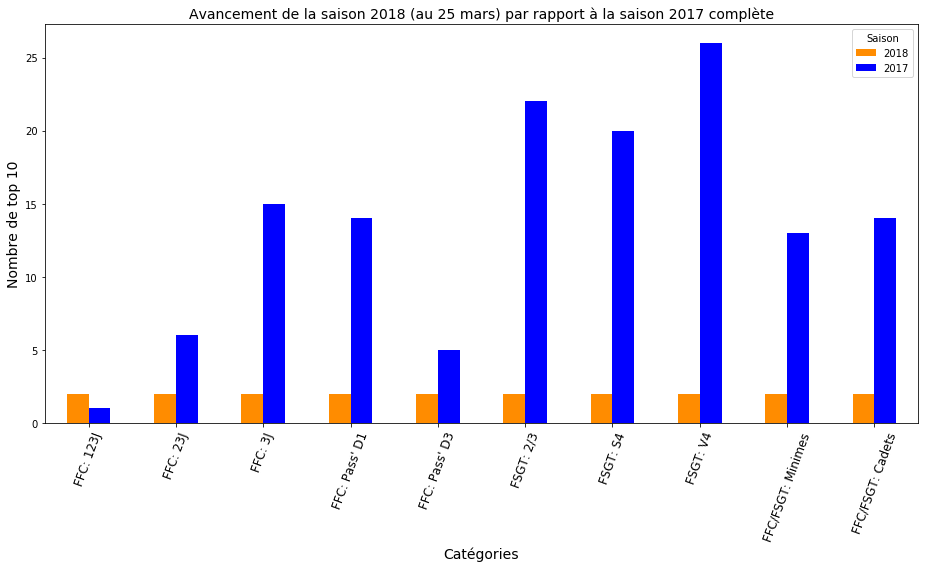

In [187]:
df_grouped = df.groupby(['Saison', 'Catégorie']).sum().amount.reset_index()# Get the amount for each day AND EACH GROUP

# Create pivot table to get the total amount for each day and each in the proper format to plot multiple series with pandas
df_pivot = df_grouped.pivot('Catégorie','Saison','amount').reset_index()
# Use Dan's trick to order days names in the table created by PIVOT (not the table created by groupby, in the previous example)

df_pivot = df_pivot[["Catégorie","2018","2017"]]
mapping = {day: i for i, day in enumerate(cats)}
key = df_pivot['Catégorie'].map(mapping)
df_pivot = df_pivot.iloc[key.argsort()]


# Draw the bar chart
graph = df_pivot.plot(kind='bar', figsize=(13,8), rot=70, color=['darkorange','blue'])
graph.set_xticklabels(['FFC: 123J','FFC: 23J','FFC: 3J','FFC: Pass\' D1','FFC: Pass\' D3','FSGT: 2/3','FSGT: S4','FSGT: V4','FFC/FSGT: Minimes','FFC/FSGT: Cadets'], fontsize=12)
graph.set_title("Avancement de la saison 2018 (au 25 mars) par rapport à la saison 2017 complète", fontsize=14)
graph.set_xlabel("Catégories", fontsize=14)
graph.set_ylabel("Nombre de top 10", fontsize=14)
plt.tight_layout()

plt.savefig('Graph.png')
plt.show()